# <a href="https://thetahat.ru/">BioMed@DataScience</a>


## Домашнее задание 3

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_bmds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b>:
* Задача 1 (90 баллов)
* Задача 2 (20 баллов)
* Задача 3 (40 баллов)
* Задача 4 (30 баллов)

<b><font color="orange">Сложная часть</font></b>:
* Задача 5 (50 баллов)

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler

---
## <font color="blue"><i>Легкая часть</i></font>

### Задача 1

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [70]:
titanic = pd.read_csv('train.csv').dropna()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [71]:
features_columns = ['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [77]:
missing_info = titanic[features_columns].isnull().sum()

titanic2 = titanic.dropna(subset=features_columns)

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [73]:
X = titanic2[features_columns]
y = titanic2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 **1.** **Исследование**


> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

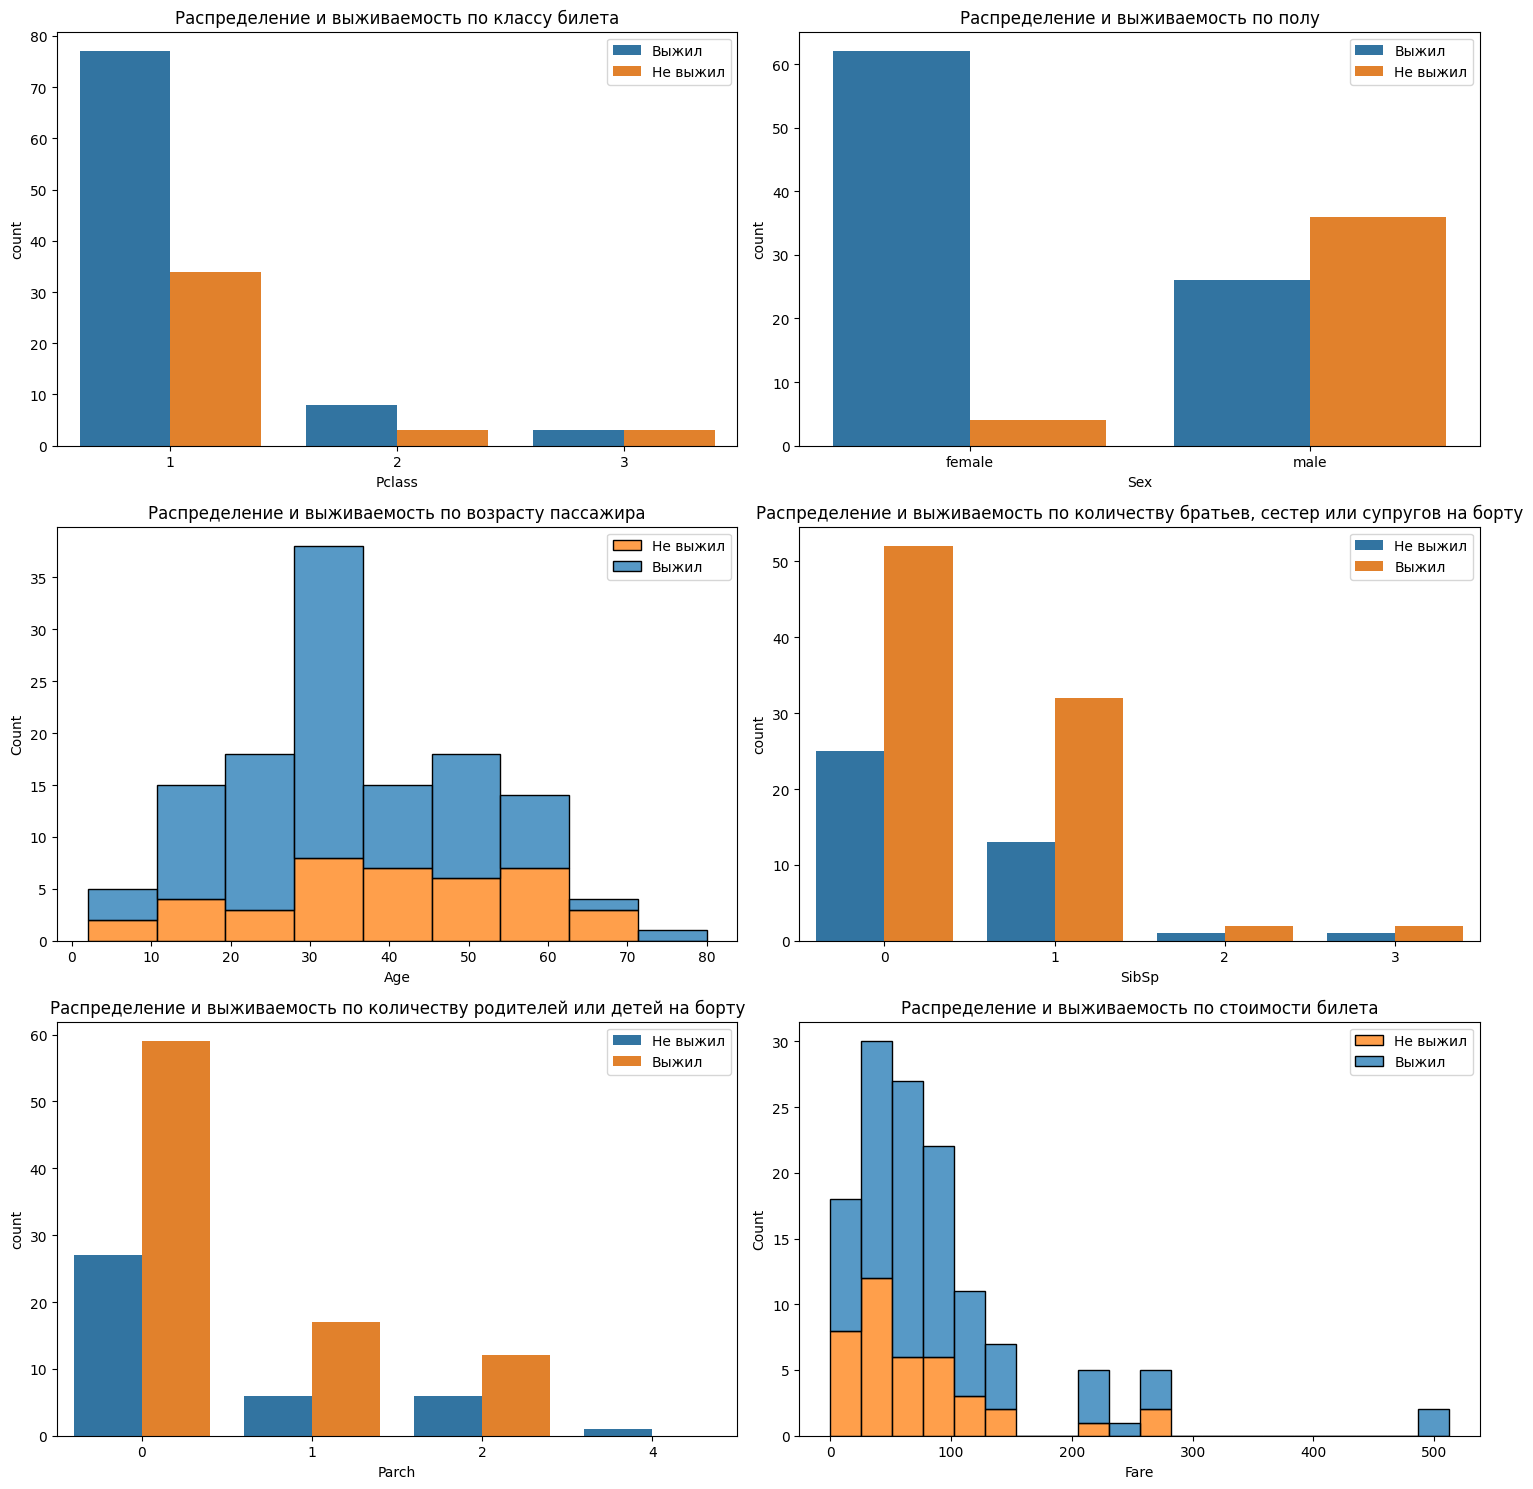

In [74]:
train_data = X_train.copy()
train_data['Survived'] = y_train

train_data['Survived_Label'] = train_data['Survived'].map({0: 'Не выжил', 1: 'Выжил'})

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.countplot(data=train_data, x='Pclass', hue='Survived_Label', ax=axes[0,0])
axes[0,0].set_title('Распределение и выживаемость по классу билета')
axes[0,0].legend(title='')

sns.countplot(data=train_data, x='Sex', hue='Survived_Label', ax=axes[0,1])
axes[0,1].set_title('Распределение и выживаемость по полу')
axes[0,1].legend(title='')

sns.histplot(data=train_data, x='Age', hue='Survived_Label', multiple='stack', ax=axes[1,0])
axes[1,0].set_title('Распределение и выживаемость по возрасту пассажира')
axes[1,0].legend(title='', labels=['Не выжил', 'Выжил'])

sns.countplot(data=train_data, x='SibSp', hue='Survived_Label', ax=axes[1,1])
axes[1,1].set_title('Распределение и выживаемость по количеству братьев, сестер или супругов на борту')
axes[1,1].legend(title='')

sns.countplot(data=train_data, x='Parch', hue='Survived_Label', ax=axes[2,0])
axes[2,0].set_title('Распределение и выживаемость по количеству родителей или детей на борту')
axes[2,0].legend(title='')

sns.histplot(data=train_data, x='Fare', hue='Survived_Label', multiple='stack', ax=axes[2,1])
axes[2,1].set_title('Распределение и выживаемость по стоимости билета')
axes[2,1].legend(title='', labels=['Не выжил', 'Выжил'])

plt.tight_layout()
plt.show()

**2.** **Классификация логическими правилами**

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**

По графику "Распределение и выживаемость по полу" видим, что женщины выживали с вероятностью более 90%. По графику "Распределение и выживаемость по классу билета" видим, что пассажиры с 1 и 2 классом с бОльшей вероятностью выживали. По графику "Распределение и выживаемость по стоимости билета" видим, что при стоимости менее 100 единиц большинство выживали. По графику "Распределение и выживаемость по возрасту пассажира" видим, что наибольшая выживаемость была в возрасте примерно от 29 до 36. На основе этих данных реализуем дерево.

**Дерево 2:**

Можно заметить, что женщины с большей вероятностью оставались в живых, поэтому во втором дереве реализуем именно это. Это видно из графика "Распределение и выживаемость по полу": женщины с вероятностью более 90% остались живы.

Реализуйте полученные деревья по шаблону

In [75]:
def tree1(features):
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    """
    predicted = pd.Series(index=features.index, dtype=int)
    
    for idx, row in features.iterrows():
        if row['Sex'] == 'female':
            if row['Pclass'] in [1, 2]:
                predicted[idx] = 1
            else:
                if row['Fare'] < 100:
                    predicted[idx] = 1
                else:
                    predicted[idx] = 0
        else:
            if row['Age'] > 29 and row['Age'] < 36:
                predicted[idx] = 1
            else:
                predicted[idx] = 0
                
    return predicted

def tree2(features):
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    """
    predicted = pd.Series(index=features.index, dtype=int)
    
    for idx, row in features.iterrows():
        if (row['Sex'] == 'female'):
            predicted[idx] = 1
        else:
            predicted[idx] = 0
            
    return predicted


Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [76]:
def accuracy(target, predicted):
    """
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    """
    correct_predictions = (target == predicted).sum()
    total_predictions = len(target)
    return correct_predictions / total_predictions

**3.** **Классификация методом ближайшего соседа**

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:** ...

Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

Как мы видим, данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**  ...


Для решения этой проблемы нужно привести признаки к единому мастштабу. Существует много методов масштабирования рассмотрим работу одиного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следущей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуеют и дргуие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода мастштабирования?

**Ваш ответ:** ...




Отмасштабируйте данные

Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

Обучите модель и сравните результат предсказаний со стандартизацией и без.

**Вывод:** ...

**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

**Вывод:**

### Задача 2

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.



Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:** ...

Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:**

**Выводы:**

### Задача 3

Реакция Вассермана позволяет обнаруживать в крови больных сифилисом определенные антитела. Рассмотрим следующую стратегию поиска больных среди группы из n человек. Все обследуемые разбиваются на пары. Если объединенная проба крови не содержит антител, то оба здоровы. В противном случае исследуется кровь первого из них. Если человек здоров, то другой должен быть болен, и в таком случае достаточно двух тестов. Если первый оказался больным, то кровь второго также должна быть подвергнута анализу, и поэтому потребуется три теста. Выясните, при каких значениях вероятности $p$ обнаружения заболевания у отдельного обследуемого данная стратегия будет в среднем экономичнее индивидуальной проверки.

Индивидуальная проверка даёт нам в любом случае $n$ тестов.

Разбив на пары получаем следующее:

Вероятность, что оба здоровы: $(1-p)^2$ (1 тест)

Вероятность, что первый здоров, второй болен: $(1-p)p$ (2 теста)

Вероятность, что второй здоров, первый болен: $p(1-p)$ (3 теста)

Вероятность, что оба больны: $p^2$ (3 теста)

$$E_{пары} = (1-p)^2 * 1 + (1-p)p * 2 + p(1-p) * 3 + p^2 * 3= (1-p)^2 + 5p(1-p) + 3p^2 = 1 - 2p + p^2 + 5p - 5p^2 + 3p^2 = 1 + 3p - p^2$$

Для $n$ человек, т.е. $n/2$ пар: $$E_{общ} = \frac{n}{2} * (1 + 3p - p^2)$$

Найдём, при каких $p$ стратегия с разбивкой на пары экономичнее, чем индивидуальная:
$$\frac{n}{2} * (1 + 3p - p^2) < n$$
$$\frac{1}{2} * (1 + 3p - p^2) < 1$$
$$1 + 3p - p^2 < 2$$
$$p^2 -3p + 1 > 0$$
$$p < \frac{3 - \sqrt{5}}{2} \: или \: p > \frac{3 + \sqrt{5}}{2}$$
Вероятность $0 \le p \le 1$, поэтому $0 < p < \frac{3 - \sqrt{5}}{2}$, т.е. вероятность должна быть ниже 38.2 %

**Ответ:** вероятность $p$ должна быть ниже 38.2 %

### Задача 4

Время жизни лейкоцита подчиняется показательному распределению с математическим ожиданием 200 часов. Найти вероятность того, что среднее время жизни выборки из 100 лейкоцитов окажется не менее 180 часов.

Время жизни одного лейкоцита: $X_i \sim \text{Exp}(\lambda)$ 

Математическое ожидание: $E(X) = \frac{1}{\lambda} = 200 \text{часов}$

Отсюда параметр распределения: $\lambda = \frac{1}{200}$

Дисперсия показательного распределения: $D(X) = \frac{1}{\lambda^2} = 200^2 = 40000 \text{часов}^2$

Объем выборки: $n = 100$

Нас интересует вероятность:  $P(\overline{X}_{100} \ge 180)$ , где  $\overline{X}_{100}$ — выборочное среднее.

Согласно ЦПТ, выборочное среднее  $\overline{X}_n = \frac{1}{n}\sum_{i=1}^{n} X_i$  при большом  $n$  имеет приближенно нормальное распределение

Значит дисперсия для среднего значения выборки равна $$\frac{D(X)}{n} = \frac{1/λ^2}{n} = \frac{1 / (1/200)^2}{100} = \frac{200^2}{100} = \frac{40000}{100} = 400$$

Среднее квадратическое отклонение (стандартная ошибка): $\sigma_{\overline{X}} = \sqrt{400} = 20$

Таким образом:
$$\overline{X}_{100} \sim N(200, 20^2)$$

Мы хотим найти  $P(\overline{X}_{100} \ge 180)$. Перейдем к стандартному нормальному распределению  $Z \sim N(0, 1)$

$$Z = \frac{\overline{X} - E(\overline{X}))}{\sigma_{\overline{X}}} = \frac{180 - 200}{20} = \frac{-20}{20} = -1$$

Тогда:
$$P(\overline{X}_{100} \ge 180) = P\left( \frac{\overline{X}_{100} - 200}{20} \ge \frac{180 - 200}{20} \right) = P\left( Z \ge -1 \right)$$

Используя таблицы стандартного нормального распределения или калькулятор, находим, что $P(Z < -1) \approx 0,1587$

Следовательно:
$$P(Z ≥ -1) ≈ 1 - 0.1587 = 0.8413$$

**Ответ:** Вероятность того, что среднее время жизни выборки из 100 лейкоцитов окажется не менее 180 часов, приблизительно равна 0.8413.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
## <font color="orange"><i>Сложная часть</i></font>

### Задача 5


Рассмотрим два молекулярных белка в клетке, каждый из которых подвержен деградации под действием протеаз. Время жизни каждого белка $X_1$ и $X_2$ является случайной величиной, которая подчиняется экспоненциальному распределению с параметром $\lambda$, что соответствует характерному механизму распада белков в биологических системах.  

Обозначим:  
- $m = \min(X_1, X_2)$ — время деградации первого белка, что соответствует скорости разрушения менее стабильного белка.  
- $M = \max(X_1, X_2)$ — время деградации второго белка, которое характеризует устойчивость более долговечного белка.  

Найдите математическое ожидание и дисперсию $m$ и $M$.  

---
© 2025 команда <a href="https://thetahat.ru/">ThetaHat</a> для BioMed@DataScience